Reproducing the double descent with rotationally invariant (non Marcenko-Pastur spectrum) matrices in LASSO setup. Comparision with experimental data using sklearn

In [1]:
# Test_sampling

import numpy as np
from VAMP_toolbox_clean import *
from sklearn import linear_model
from math import isnan
import time

In [2]:
# Rotationally invariant with specifically designed spectrum (non-MP) to generate double decent, experiment

asp_vec = np.linspace(0.5,3,50)
E_vec = np.zeros(50)
rho = 0.3
delta0 = 0.05
avg = 100  # averagin parameter

for i in range(len(asp_vec)):
    if i<=15:
        d = 250
    else:
        d = 100
    asp = asp_vec[i]
    print(asp)
    n = int(asp*d)
    E_exp = np.zeros(avg)
    for k in range(avg):
        print(k)
        F_train,D = build_matrix((1-asp)**2,(1+asp)**2,n,d,asp,1)
        x0 = gauss_bernoulli(rho,d)
        w = np.random.normal(0,np.sqrt(delta0),n)
        y_train = F_train@x0+w
        clf = linear_model.ElasticNet(alpha=0.0001/n,l1_ratio=1,max_iter = 1000000,tol = 0.00001)
        clf.fit(F_train,y_train)
        x_train = clf.coef_
        E_exp[k] = np.mean((x0-x_train)**2)
    
        #print(E_exp,np.mean(E_exp),np.var(E_exp))
        
    E_vec[i] = np.mean(E_exp)

0.5
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.5510204081632653
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.6020408163265306
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0.653061224489796
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26

61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
1.8775510204081634
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
1.9285714285714286
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
1.9795918367346939
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
8

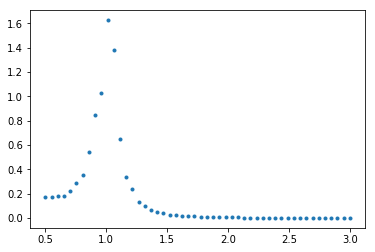

In [3]:
plt.plot(asp_vec,E_vec,'.') # check

In [4]:
# Vanishing regularization parameter (near interpolation), theory using SE asymptotics/replica prediction

my_eps = 0
niter = 100
damp_se = 1
reg = 0.0001

asp_vec_th = np.linspace(0.5,3,250)
E_vec_th = np.zeros(len(asp_vec_th))
    
#reg = reg_vec_th[i]

for k in range(len(asp_vec_th)):
    
    print(k)
    asp = asp_vec_th[k]
    alpha1_vec,alpha2_vec,eta1_vec,eta2_vec,gamma1_vec,gamma2_vec,E1_vec,E2_vec,tau1_vec,tau2_vec = VAMP_SE_l1_unif(asp,rho,delta0,reg,niter,damp_se,my_eps,1)
    
    V = 1/2*(1/eta1_vec[-1]+1/eta2_vec[-1])
    A1 = alpha1_vec[-1]/V
    A2 = alpha2_vec[-1]/V
    tau1 = tau1_vec[-1]
    tau2 = tau2_vec[-1]
    E = 1/2*(E1_vec[-1]+E2_vec[-1])
    
    while isnan(E) == True:
        print('Restarting iteration')
        alpha1_vec,alpha2_vec,eta1_vec,eta2_vec,gamma1_vec,gamma2_vec,E1_vec,E2_vec,tau1_vec,tau2_vec = VAMP_SE_l1_unif(asp,rho,delta0,reg,niter,damp_se,my_eps,1)
        
        V = 1/2*(1/eta1_vec[-1]+1/eta2_vec[-1])
        A1 = alpha1_vec[-1]/V
        A2 = alpha2_vec[-1]/V
        tau1 = tau1_vec[-1]
        tau2 = tau2_vec[-1]
        E = 1/2*(E1_vec[-1]+E2_vec[-1])
        
    E_vec_th[k] = E    
    print(E)

0
0.18746311635198054
1
0.18588422754674314
2
0.18459170409777037
3
0.1835959730166417
4
0.18290810663418444
5
0.18254009864158827
6
0.18250513147227404
7
0.18281770099096126
8
0.18349405753674392
9
0.18455251122814803
10
0.18601378637902735
11
0.18790150412503703
12
0.19024265920124275
13
0.1930682733703499
14
0.19641396994624816
15
0.20032086079769656
16
0.20483644123081107
17
0.21001577746431108
18
0.21592301538920408
19
0.22263139693692988
20
0.2302292077628027
21


/Users/cedricgerbelot-barrillon/.local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


0.23881484171442663
22
0.24850903293221255
23
0.2594499729960121
24
0.27180123767405273
25
0.28575575185880875
26
0.30154223421544535
27
0.3194308640300534
28
0.3397423284686958
29
0.36285889427410156
30
0.38923058622165885
31
0.4193903475552706
32
0.45396097519686474
33
0.4936599603428492
34
0.5392909615259129
35
0.5912392713074293
36
0.6517410249674249
37
0.7200023538112825
38
0.7965791783246645
39
0.8804750099214917
40
0.9688226060889505
41
1.0557277954737803
42
1.13392348061041
43
1.1933004426920832
44
1.2286717806892624
45
1.2416205089157328
46
1.2393992316101023
47
1.2298240800929148
48
1.2178408213087035
49
1.205461953892185
50
1.1925388421139336
51
1.177313294514006
52
1.1622565701707437
53
1.1465405636294852
54
1.1276062966950484
55
1.100480146498064
56
1.0590467813096773
57
0.9996779038809582
58
0.9242406548946791
59
0.8391821534940205
60
0.7519735847582181
61
0.668378316561949
62
0.5917152614727244
63
0.5233384001234352
64
0.46333245817329693
65
0.4111425057429933
66
0.36593

In [5]:
#print(E_vec_th) check

[1.87463116e-01 1.85884228e-01 1.84591704e-01 1.83595973e-01
 1.82908107e-01 1.82540099e-01 1.82505131e-01 1.82817701e-01
 1.83494058e-01 1.84552511e-01 1.86013786e-01 1.87901504e-01
 1.90242659e-01 1.93068273e-01 1.96413970e-01 2.00320861e-01
 2.04836441e-01 2.10015777e-01 2.15923015e-01 2.22631397e-01
 2.30229208e-01 2.38814842e-01 2.48509033e-01 2.59449973e-01
 2.71801238e-01 2.85755752e-01 3.01542234e-01 3.19430864e-01
 3.39742328e-01 3.62858894e-01 3.89230586e-01 4.19390348e-01
 4.53960975e-01 4.93659960e-01 5.39290962e-01 5.91239271e-01
 6.51741025e-01 7.20002354e-01 7.96579178e-01 8.80475010e-01
 9.68822606e-01 1.05572780e+00 1.13392348e+00 1.19330044e+00
 1.22867178e+00 1.24162051e+00 1.23939923e+00 1.22982408e+00
 1.21784082e+00 1.20546195e+00 1.19253884e+00 1.17731329e+00
 1.16225657e+00 1.14654056e+00 1.12760630e+00 1.10048015e+00
 1.05904678e+00 9.99677904e-01 9.24240655e-01 8.39182153e-01
 7.51973585e-01 6.68378317e-01 5.91715261e-01 5.23338400e-01
 4.63332458e-01 4.111425

(0, 1)

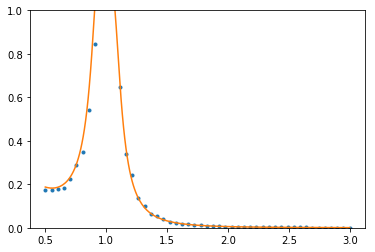

In [6]:
plt.plot(asp_vec,E_vec,'.')
plt.plot(asp_vec_th,E_vec_th)  # check
plt.ylim(0,1)

In [7]:
# larger regularization, experiment

asp_vec = np.linspace(0.5,3,50)
E_vec2 = np.zeros(50)
rho = 0.3
delta0 = 0.05
d = 250
avg = 100

for i in range(len(asp_vec)):
    asp = asp_vec[i]
    print(asp)
    n = int(asp*d)
    E_exp = np.zeros(avg)
    for k in range(avg):
    
        F_train,D = build_matrix((1-asp)**2,(1+asp)**2,n,d,asp,1)
        x0 = gauss_bernoulli(rho,d)
        w = np.random.normal(0,np.sqrt(delta0),n)
        y_train = F_train@x0+w
        clf = linear_model.ElasticNet(alpha=0.1/n,l1_ratio=1,max_iter = 1000000,tol = 0.00001)
        clf.fit(F_train,y_train)
        x_train = clf.coef_
        E_exp[k] = np.mean((x0-x_train)**2)
    
        #print(E_exp,np.mean(E_exp),np.var(E_exp))
        
    E_vec2[i] = np.mean(E_exp)

0.5
0.5510204081632653
0.6020408163265306
0.653061224489796
0.7040816326530612
0.7551020408163265
0.8061224489795918
0.8571428571428572
0.9081632653061225
0.9591836734693877
1.010204081632653
1.0612244897959184
1.1122448979591837
1.163265306122449
1.2142857142857144
1.2653061224489797
1.316326530612245
1.3673469387755102
1.4183673469387754
1.469387755102041
1.5204081632653061
1.5714285714285714
1.6224489795918369
1.6734693877551021
1.7244897959183674
1.7755102040816326
1.8265306122448979
1.8775510204081634
1.9285714285714286
1.9795918367346939
2.0306122448979593
2.0816326530612246
2.13265306122449
2.183673469387755
2.2346938775510203
2.2857142857142856
2.336734693877551
2.387755102040816
2.438775510204082
2.489795918367347
2.5408163265306123
2.5918367346938775
2.642857142857143
2.693877551020408
2.7448979591836737
2.795918367346939
2.8469387755102042
2.8979591836734695
2.9489795918367347
3.0


In [8]:
# larger regularization, theory

my_eps = 0
niter = 100
damp_se = 1
reg = 0.1


asp_vec_th = np.linspace(0.5,3,250)
E_vec2_th = np.zeros(len(asp_vec_th))
    
#reg = reg_vec_th[i]

for k in range(len(asp_vec_th)):
    
    print(k)
    asp = asp_vec_th[k]
    alpha1_vec,alpha2_vec,eta1_vec,eta2_vec,gamma1_vec,gamma2_vec,E1_vec,E2_vec,tau1_vec,tau2_vec = VAMP_SE_l1_unif(asp,rho,delta0,reg,niter,damp_se,my_eps,1)
    
    V = 1/2*(1/eta1_vec[-1]+1/eta2_vec[-1])
    A1 = alpha1_vec[-1]/V
    A2 = alpha2_vec[-1]/V
    tau1 = tau1_vec[-1]
    tau2 = tau2_vec[-1]
    E = 1/2*(E1_vec[-1]+E2_vec[-1])
    
    while isnan(E) == True:
        print('Restarting iteration')
        alpha1_vec,alpha2_vec,eta1_vec,eta2_vec,gamma1_vec,gamma2_vec,E1_vec,E2_vec,tau1_vec,tau2_vec = VAMP_SE_l1_unif(asp,rho,delta0,reg,niter,damp_se,my_eps,1)
        
        V = 1/2*(1/eta1_vec[-1]+1/eta2_vec[-1])
        A1 = alpha1_vec[-1]/V
        A2 = alpha2_vec[-1]/V
        tau1 = tau1_vec[-1]
        tau2 = tau2_vec[-1]
        E = 1/2*(E1_vec[-1]+E2_vec[-1])
        
    E_vec2_th[k] = E    
    print(E)

0
0.13199711980008205
1
0.127535477959311
2
0.12314912383410818
3
0.1188395612328726
4
0.11460835148861867
5
0.11045707026542931
6
0.10638725549040362
7
0.10240061972209188
8
0.09849881646880157
9
0.09468357619255685
10
0.09095663134429494
11
0.08731973153077434
12


/Users/cedricgerbelot-barrillon/.local/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:269: RuntimeWarning: invalid value encountered in sqrt
  eta1 = gamma1/alpha1
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:272: RuntimeWarning: invalid value encountered in sqrt
  E1 = damp_se*(E1_in

Restarting iteration
0.0837746231529651
13
0.08032292164046034
14
0.07696634197955199
15
0.07370632762266441
16
0.07054425636689532
17
0.06748146717568859
18
0.06451886196550286
19
0.061657229176736536
20
0.05889721420472541
21
0.056238938668651
22
0.05368248135906003
23
0.05122747730709329
24
0.048873259360947136
25
0.04661889883808619
26
0.04446303095641903
27
0.042404176609045274
28
0.04044043580396725
29
0.038569696484139444
30
0.036789612339142144
31
0.03509761034532958
32
0.03349095689121893
33
0.031966755045163955
34
0.030522009240340278
35


/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  alpha2 = damp_se*(max(0,1-asp)+integrate.quad(lambda p: asp*f(p)*gamma2/(p+gamma2),0,np.inf)[0])+(1-damp_se)*alpha2
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:275: RuntimeWarning: invalid value encountered in double_scalars
  alpha2 = damp_se*(max(0,1-asp)+integrate.quad(lambda p: asp*f(p)*gamma2/(p+gamma2),0,np.inf)[0])+(1-damp_se)*alpha2
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:268: RuntimeWarning: invalid value encountered in double_scalars
  alpha1 = damp_se*my_e*((1-rho)*special.erfc(reg/(gamma1*np.sqrt(2*tau1)))+rho*special.erfc(reg/(gamma1*np.sqrt(2*(1+tau1)))))+(1-damp_se)*alpha1
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHIN

Restarting iteration
0.029152774712352586
36
0.027858448937119723
37
0.026633323180920106
38
0.025475042815217126
39
0.02438047504179297
40
0.023346488583224953
41
0.0223698582038723
42
0.021448100419968617
43
0.02057780935068139
44
0.019756347179588168
45
0.01898100633198844
46
0.018249192854971563
47
0.01755842818108367
48
0.01690634153811362
49
0.016290581603455447
50
0.015778925719888176
51
0.015558029856423676
52
0.015340107212664933
53
0.015124765659579625
54
0.014912007716152753
55
0.014701843659761854
56
0.014494288377458073
57
0.014289358288734712
58
0.01408704853141992
59
0.013887350193044433
60
0.013690291450044224
61
0.01349584418353595
62
0.013304023950147941
63
0.013114812290160935
64
0.012928201060569522
65
0.012744180007090313
66
0.012562731549938005
67
0.012383852909889005
68
0.012207513199164143
69
0.012033701985855367
70
0.011862399116006754
71
0.01169341915390033
72
0.01152720646150791
73
0.011363270207988427
74
0.011201739496963597
75
0.011042584657193504
76
0.0108

/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:248: RuntimeWarning: divide by zero encountered in double_scalars
  gamma2 = eta1-gamma1
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:254: RuntimeWarning: invalid value encountered in double_scalars
  eta2 = gamma2/alpha2
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:256: RuntimeWarning: invalid value encountered in double_scalars
  # update


Restarting iteration
0.008664332230836043
93
0.008541948263860937
94
0.00842060018967605
95
0.008300882563753846
96
0.008182616333517663
97
0.008065867265403454
98
0.00795055310080305
99
0.007836638655010011
100
0.007724081979221328
101
0.007612851765655244
102
0.007502912822480105
103
0.007394229338833391
104
0.00728676608125885
105
0.007180487373825609
106
0.007075379019155835
107
0.006971416935539232
108
0.00686856367686616
109
0.006766795334428042
110
0.006666099679154452
111
0.0065647079868871305
112
0.006467860145927435
113
0.006370276749487001
114
0.006273706546673618
115
0.006178133545162976
116
0.006083541608152693
117
0.005989951216308603
118
0.005897323399612494
119
0.005805658680157231
120
0.005714988804259371
121
0.005625277849745133
122
0.005536530278565618
123
0.005448758846496779
124
0.005361950957703605
125
0.005276117564872047
126
0.00519126156938206
127
0.005107387342460863
128
0.0050244800870312125
129
0.0049425674207284435
130
0.004861640422202382
131
0.00478332333

/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:277: RuntimeWarning: invalid value encountered in double_scalars
  E2 = damp_se*(max(0,1-asp)*tau2+integrate.quad(lambda p : asp*f(p)*(delta0*p+tau2*gamma2**2)/(p+gamma2)**2,0,np.inf)[0])+(1-damp_se)*E2


Restarting iteration
0.004547924709906229
135
0.004471998733306603
136
0.0043972216020690316
137
0.0043232070366588295
138
0.004250327425404761
139
0.004178472346327981
140
0.004107626370123355
141
0.004037801136060312
142
0.003968992519394846
143
0.003901205170889371
144
0.003834432084671535
145
0.003768673948421261
146
0.003703928179450626
147
0.0036401905261483304
148
0.0035774509161765554
149
0.0035157142262293916
150
0.0034549674057904912
151
0.0033952078347620346
152
0.0033364181894729016
153
0.0032786404602153352
154
0.00322179190483574
155
0.0031659191113042337
156
0.003111014164261081
157
0.0030570352159510423
158
0.003003986984128806
159
0.0029518646182646897
160
0.002900655042023725
161
0.0028503582605695615
162
0.00280094094278354
163
0.002753622172304128
164


/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:278: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/cedricgerbelot-barrillon/Desktop/ENS-SPHINX/Projects/Preuve_VAMP:GVAMP - ONGOING/VAMP_numerics/VAMP_toolbox_clean.py:282: RuntimeWarning: invalid value encountered in double_scalars
  


Restarting iteration
0.0027047527134493503
165
0.0026579522690846112
166
0.0026119909140988684
167
0.0025668893583925315
168
0.0025226148421435826
169
0.0024791260645657554
170
0.002436454755667709
171
0.0023945674258504445
172
0.002353465090072793
173
0.002313120754843857
174
0.0022735375285474757
175
0.0022346836631191537
176
0.0021965675887830097
177
0.0021591598666216207
178
0.0021224619487564753
179
0.0020864548156376917
180
0.0020511281031372524
181
0.002016469936694586
182
0.0019824674759557816
183
0.0019491096670169222
184
0.0019163831735566706
185
0.0018841483542165363
186
0.0018527831354369312
187
0.0018218944095886838
188
0.0017915837820897513
189
0.001761824866291407
190
0.001732689053261312
191
0.0017040691630726516
192
0.0016760097842200873
193
0.001648474211256763
194
0.0016214654089094648
195
0.0015949680287544016
196
0.0015689688735775116
197
0.001543467577415103
198
0.0015184443132886661
199
0.0014938856189602098
200
0.0014698232121548964
201
0.0014461965794270743
202

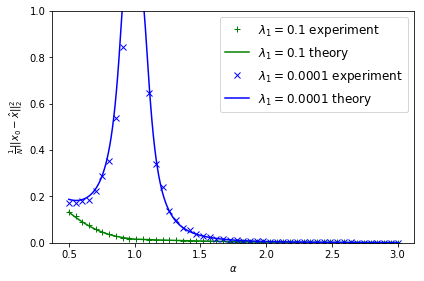

In [9]:
plt.ylabel(r'$\frac{1}{N}||x_{0}-\hat{x}||_{2}^{2}$')
plt.xlabel(r'$\alpha$')
plt.plot(asp_vec,E_vec2,'+g',label = r'$\lambda_{1} = 0.1$ experiment')
plt.plot(asp_vec_th,E_vec2_th,'g',label = r'$\lambda_{1} = 0.1$ theory')
plt.plot(asp_vec,E_vec,'xb',label = r'$\lambda_{1} = 0.0001$ experiment')
plt.plot(asp_vec_th,E_vec_th,'b',label = r'$\lambda_{1} = 0.0001$ theory')
plt.tight_layout()
plt.legend(fontsize = 12)
plt.ylim(0,1)
plt.rc('axes', labelsize = 15)
plt.savefig('generalization', dpi=500, quality = 95)